<a href="https://colab.research.google.com/github/Aseelfawaz/exam2/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/week2/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9090,9:30:00,Tuesday,Over 51,Male,Junior high school,Employee,5-10yr,Automobile,NaN,NaN,...,Moving Backward,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Overtaking,Slight Injury
5176,0:30:00,Wednesday,Unknown,Female,High school,Employee,Below 1yr,Other,Owner,5-10yrs,...,Going straight,Pedestrian,Male,18-30,3,Other,Normal,"In carriageway, statioNot a Pedestrianry - not...",Changing lane to the left,Slight Injury
11415,17:21:00,Thursday,18-30,Male,High school,Employee,2-5yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Driving to the left,Slight Injury
8619,19:00:00,Friday,Over 51,Male,Junior high school,Owner,1-2yr,Public (12 seats),NaN,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
7677,1:35:00,Sunday,Over 51,Male,Elementary school,Employee,1-2yr,Long lorry,Owner,2-5yrs,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
2967,19:55:00,Sunday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Turnover,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
6336,10:00:00,Saturday,18-30,Male,NaN,NaN,NaN,Other,Owner,5-10yrs,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
6442,8:29:00,Thursday,31-50,Male,Elementary school,Owner,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Moving Backward,Serious Injury
7185,16:45:00,Tuesday,Under 18,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Moving Backward,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
3469,0:30:00,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Other,Owner,5-10yrs,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.query('Age_band_of_driver	== "18-30"')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12306,17:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,1-2yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
12308,17:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,NaN,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12310,9:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,...,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df.query('Driving_experience	== "2-5yr"')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
17,22:45:00,Monday,18-30,Male,Elementary school,Employee,2-5yr,Public (13?45 seats),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
18,22:45:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Above 10yr,...,Moving Backward,na,na,na,na,Unemployed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12304,7:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Going straight,Driver or rider,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,Overtaking,Slight Injury
12305,7:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Public (> 45 seats),Owner,1-2yr,...,Moving Backward,Passenger,Male,Over 51,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
12306,17:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,1-2yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

12316

In [ ]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [ ]:
df['Fitness_of_casuality'].value_counts()

,count
Fitness_of_casuality,
Normal,9608
NormalNormal,19
Deaf,18
Other,18
Blind,18


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [75]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [89]:
y_train.isnull().sum()

0

In [91]:
y_train.drop_duplicates(inplace=True)

In [99]:
X_train.isnull().sum().sum()

16048

In [95]:
X_train.drop_duplicates(inplace=True)

In [173]:
from sklearn.linear_model import LinearRegression

X_pro = X_train[['Sex_of_driver']].copy()
X_pro['Sex_of_driver'] = X_pro['Sex_of_driver'].map({'Male':0, 'Female':1})


lr = LinearRegression()



In [102]:
y_pred_sk = 11
13000 *  y_pred_sk + 0

143000

In [104]:
X_train,y_train.fillna(0)

(           Time Day_of_week Age_band_of_driver Sex_of_driver  \
 6571   17:19:00    Thursday            Unknown          Male   
 7945   19:41:00    Thursday              18-30          Male   
 9430   20:10:00      Friday              31-50          Male   
 549    13:09:00     Tuesday              31-50          Male   
 9290   15:50:00    Thursday            Unknown        Female   
 ...         ...         ...                ...           ...   
 11964  17:45:00   Wednesday            Unknown          Male   
 5191   17:17:00   Wednesday              31-50          Male   
 5390   12:19:00   Wednesday              31-50          Male   
 860     8:55:00    Thursday            Over 51          Male   
 7270    8:51:00      Friday              31-50          Male   
 
         Educational_level Vehicle_driver_relation Driving_experience  \
 6571    Elementary school                Employee          Below 1yr   
 7945   Junior high school                   Owner                NaN   

In [ ]:

df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Sex_of_driver'].fillna(df['Sex_of_driver'].mode()[0], inplace=True)
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)
df.isnull().sum()


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [63]:
cat_data = df.select_dtypes(include='object')
num_data = df.select_dtypes(exclude='object')

In [64]:
cat_data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [65]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
ord_encoder.fit(cat_data)
ord_encoder.transform(cat_data)

array([[420.,   1.,   0., ...,   5.,   9.,   2.],
       [420.,   1.,   1., ...,   5.,  16.,   2.],
       [420.,   1.,   0., ...,   5.,   0.,   1.],
       ...,
       [246.,   3.,   2., ...,   5.,   1.,   1.],
       [246.,   3.,   0., ...,   5.,   5.,   2.],
       [246.,   3.,   0., ...,   1.,   1.,   2.]])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(num_data)
num_data = scaler.transform(num_data)

In [67]:
  num_data

array([[-0.05906077,  0.44864885],
       [-0.05906077,  0.44864885],
       [-0.05906077,  0.44864885],
       ...,
       [-1.51094177, -0.54426386],
       [-0.05906077, -0.54426386],
       [-0.05906077, -0.54426386]])

In [109]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(cat_data)
cat_data = one_hot_encoder.transform(cat_data)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
        <Axes: title={'center': 'Number_of_casualties'}>]], dtype=object)

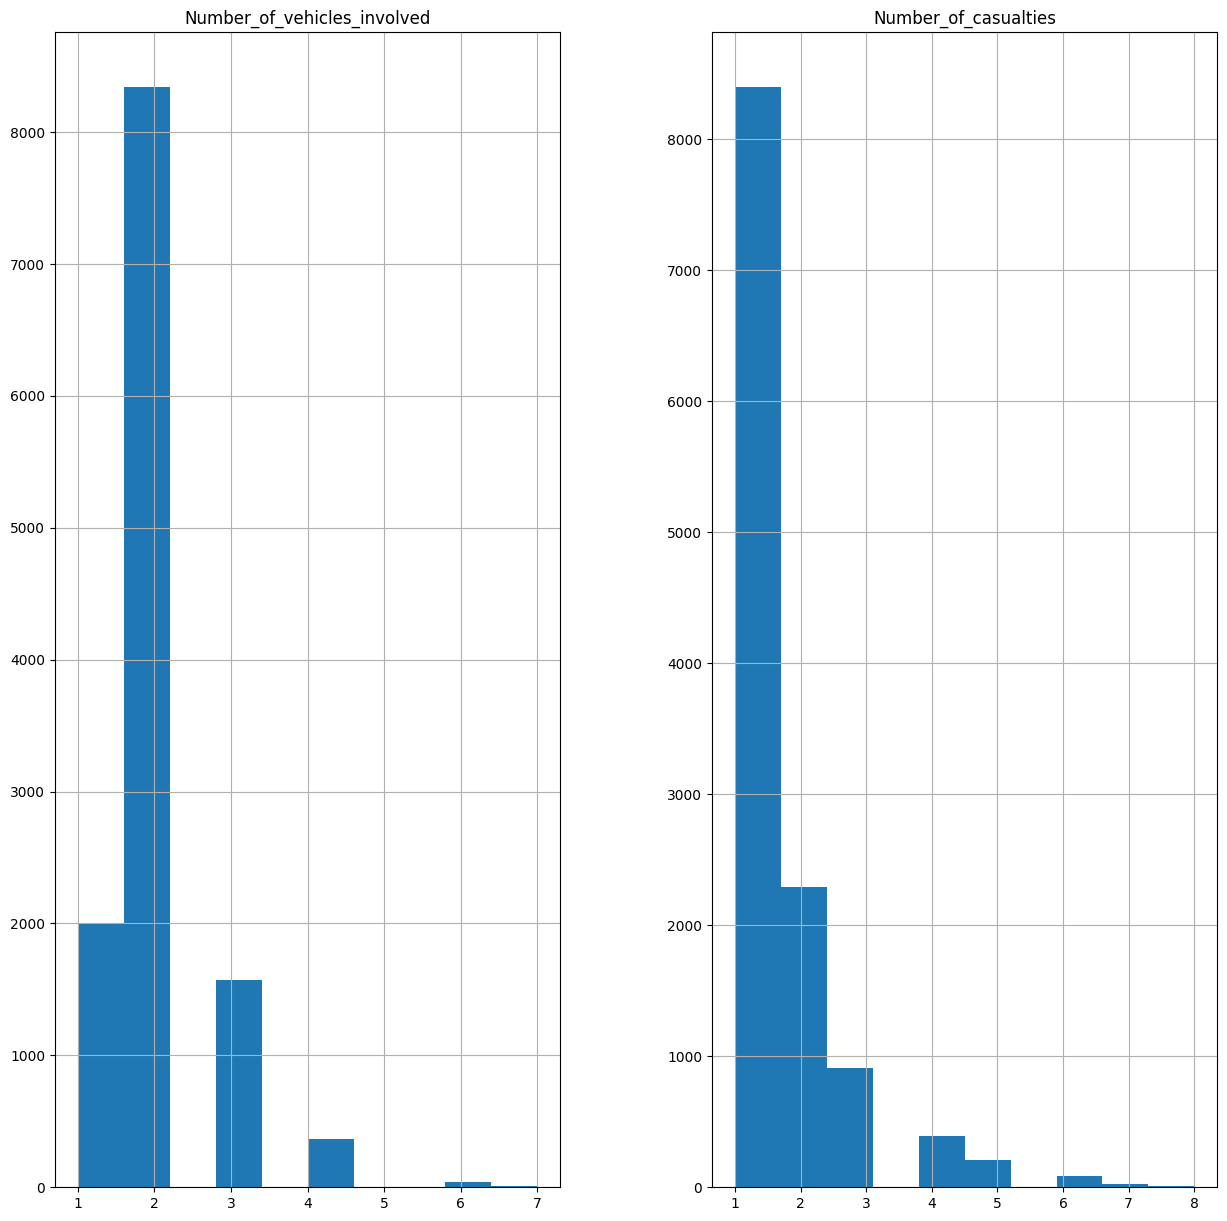

In [ ]:
df.hist(figsize=(15,15))

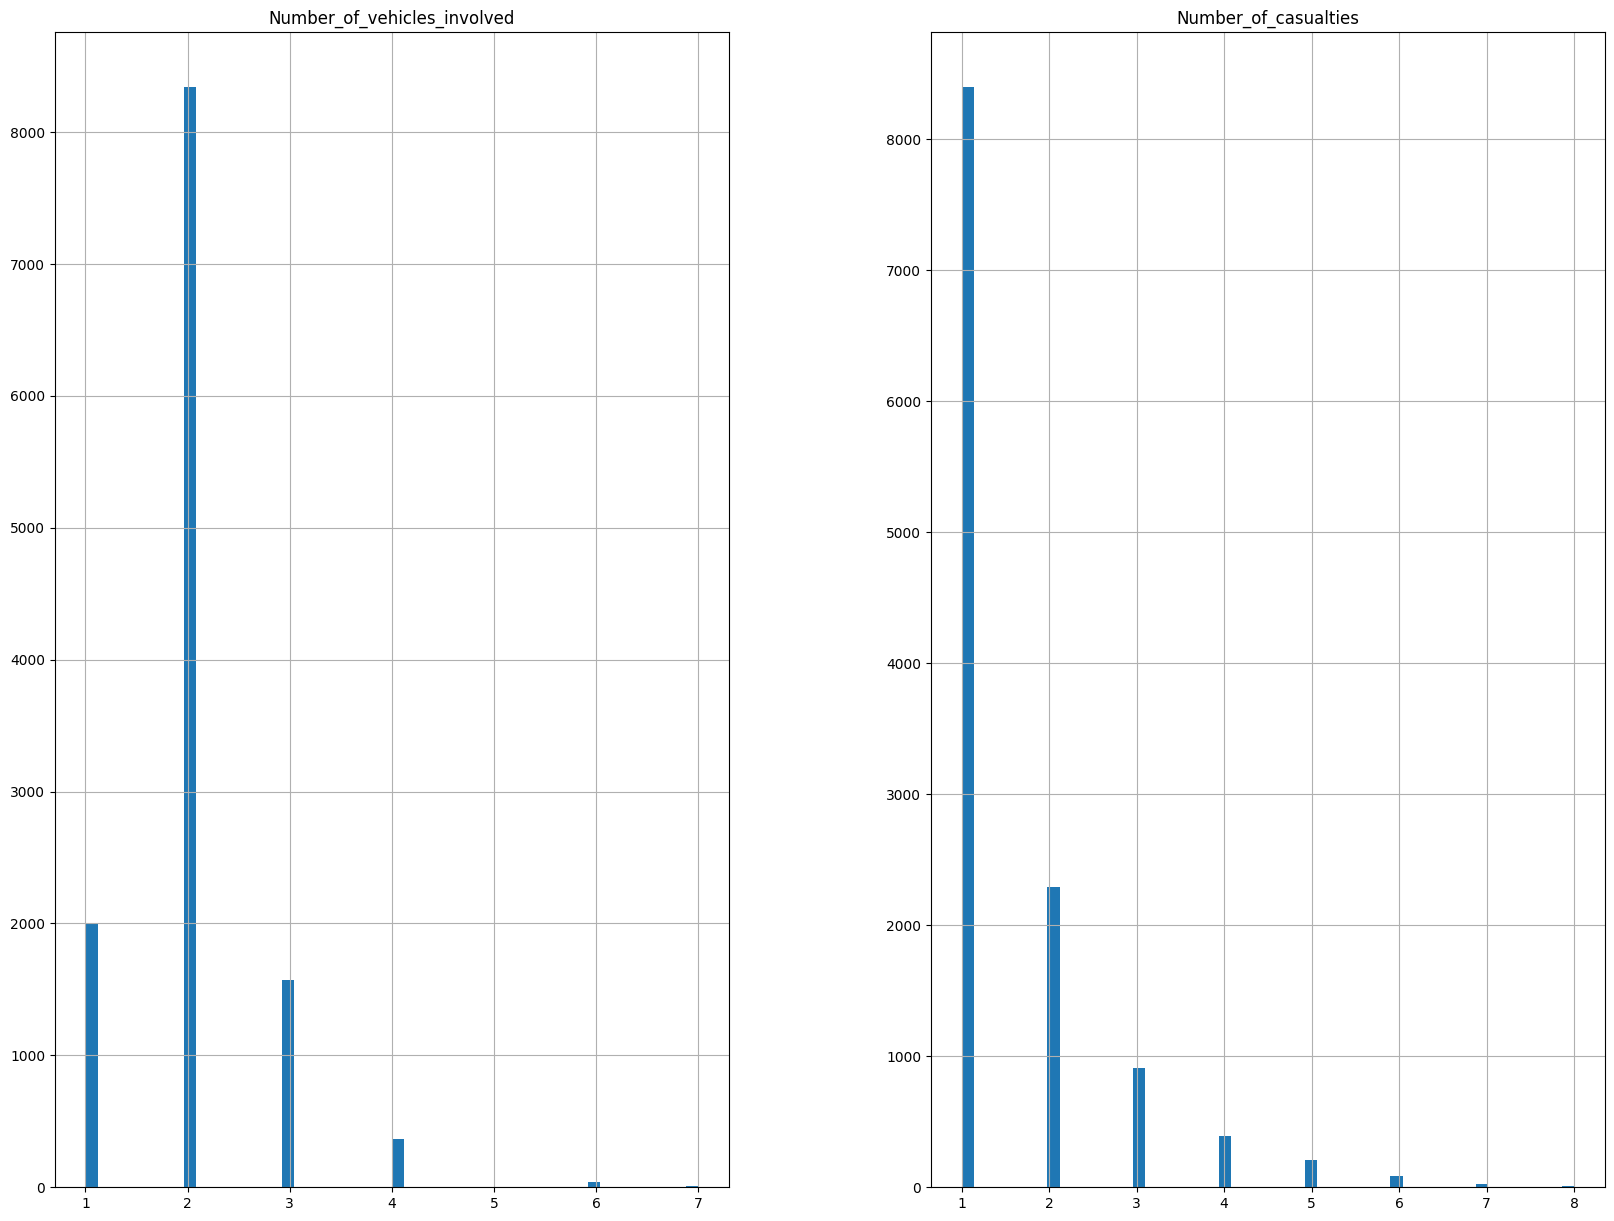

In [ ]:
df.hist(bins=50, figsize=(20,15));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

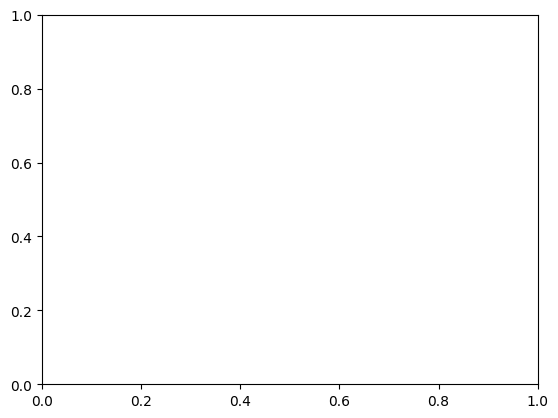

In [ ]:
sns.boxplot(df[['Day_of_week', 'Age_band_of_driver']]);

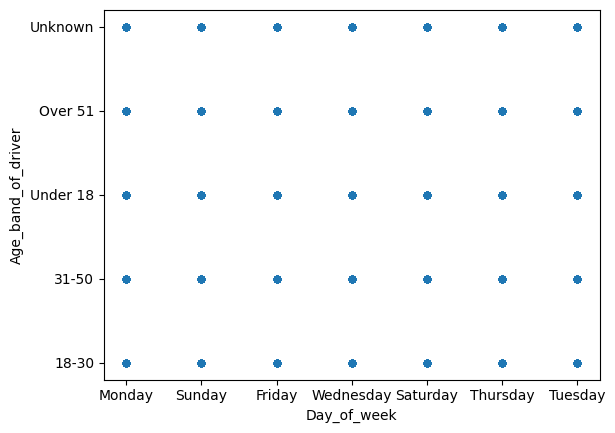

In [123]:
df.plot(kind='scatter', x='Day_of_week', y='Age_band_of_driver');

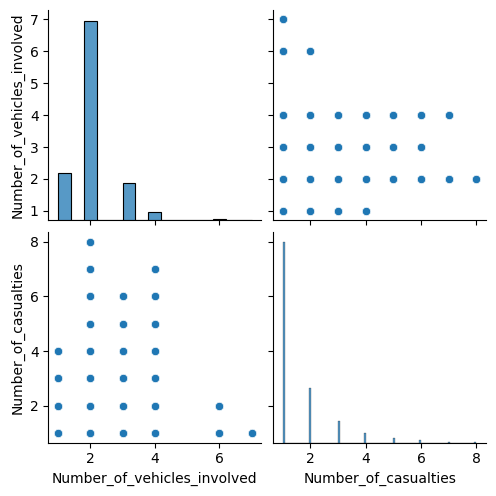

In [128]:
sns.pairplot(df)

In [129]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


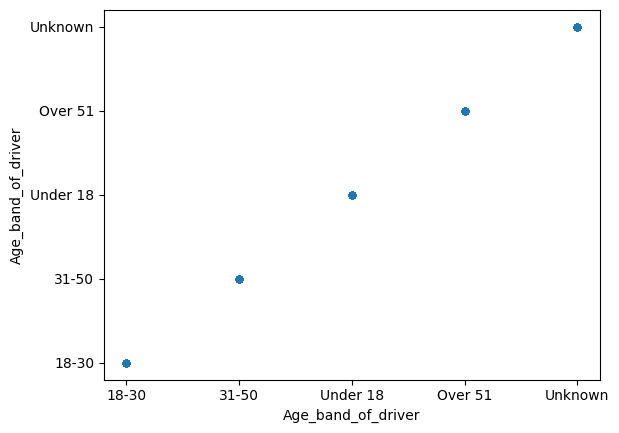

In [134]:
df.plot(kind='scatter', x='Age_band_of_driver', y='Age_band_of_driver', alpha=0.2);

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

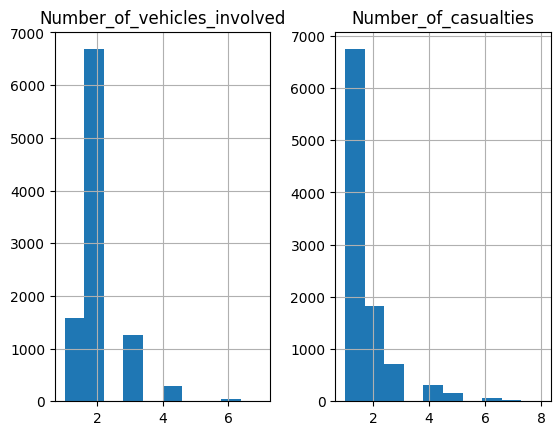

In [ ]:
X_train.hist();

In [138]:
X_test

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
4281,14:27:00,Friday,Over 51,Male,Junior high school,Employee,Above 10yr,NaN,Owner,2-5yrs,...,2,U-Turn,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left
4010,16:00:00,Sunday,Under 18,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,NaN,...,2,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly
1022,16:56:00,Wednesday,18-30,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Getting off,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing
8775,15:48:00,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Public (12 seats),Owner,NaN,...,1,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward
10000,12:48:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Unknown,...,1,Going straight,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,8:30:00,Wednesday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,5-10yrs,...,2,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,Driving carelessly
10398,12:47:00,Sunday,31-50,Male,Junior high school,Employee,Above 10yr,Public (13?45 seats),Governmental,NaN,...,1,Getting off,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking
3544,14:50:00,Saturday,Over 51,Male,Junior high school,Owner,1-2yr,Public (12 seats),Governmental,NaN,...,2,Other,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian
6312,6:45:00,Tuesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.


#### Logistic Regression

In [119]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


X_train_preprocessed = preproce_pipe.fit_transform(X_train)
X_test_preprocessed = preproce_pipe.transform(X_test)

ValueError: Found unknown categories ['23:19:00', '1:08:00', '21:36:00', '14:21:00', '18:38:00', '11:17:00', '13:14:00', '14:47:00', '20:13:00', '13:59:00', '20:58:00', '16:34:00', '20:33:00', '23:51:00', '15:22:00', '0:52:00', '2:47:00', '11:53:00', '19:34:00', '18:58:00', '4:49:00'] in column 0 during transform

In [136]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#lr.fit(X_train_processed, y_train)

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_processed, y_train)

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_processed, y_train)

#### K-Neighbors Classifier

In [121]:
from sklearn.impute import KNNImputer


imputer = KNNImputer()

imputer.fit(num_data) # calculate mean
num_data = imputer.transform(num_data)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [158]:
#X_train['Time'] = .replace(':')

df['Time'] = df['Time'].replace(':', regex=True)
X_train['Time'] = X_train['Time'].replace(':', regex=True)

In [176]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [181]:
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_train = X_train.replace(':','-',regex=True)

In [182]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [170]:
X_train.Time.dt.hour

,Time
6571,17
7945,19
9430,20
549,13
9290,15
7974,21
4463,8
3027,8
6240,3
5508,7


In [ ]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: